<a href="https://colab.research.google.com/github/securitylab-repository/TPS-IA/blob/master/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***L'objectif du TP est d'implémenter un classifier utilisant la régression linéaire***

In [133]:
from IPython.display import display
import numpy as np
import pandas as pd

class Classifier:
  def __init__(self, cls_type="Generic"):
    
      self.cls_type = cls_type
  
  def __str__(self):
    
      return "{} classifier".format(self.cls_type)
  
  def __repr__(self):
    
      return "{} classifier".format(self.cls_type)

  def _ipython_display_(self):
    
      return "{} classifier".format(self.cls_type)


  def __getattr__(self,name):

      print("{} don't exist in {} classifier".format(name,self.cls_type))


class LinearClassifier(Classifier):
  
  def __init__(self, alpha=1):

    Classifier.__init__(self,"LinearRegression")
    self.alpha = alpha
    
    
  def fit(self,X = [],y = [],max_steps = 10000):

    self.steps = 0
    self.max_steps = max_steps
    self.X = X
    self.y = y
    self.costs = []
    self.thetas = []
    
    # calculer le nombre d'exemples d'entrainement
    self.m = np.ma.size(self.X,axis=1)
    
    
    # nombre de features dans X
    x_nb_col = np.ma.size(self.X,axis=0)
    
    #générer le vecteur colonne theta initial selon le nombre de features dans X
    np.random.seed(123) #Set the seed
    self.theta = np.array([np.random.rand(2)]).T #Pick some random values to start with
    #self.theta = np.array([np.linspace(1,200,x_nb_col)]).T
    
        
    
    while (self.steps < self.max_steps):
        
        # calculer la fonction hypothèse
        h = np.dot(X, self.theta)
    
        # calculer l'erreur
        erreur = h - self.y
    
        # calculer la fonction de coût J(theta)
        cost = (1/(2 * self.m)) * np.dot(erreur.T, erreur)
    
        # sauvegarder le coût actuel
        self.costs.append(cost)
    
        # gradient descent
    
        self.theta = self.theta - (self.alpha * (1/self.m) * np.dot(self.X.T, erreur))
        self.thetas.append(self.theta)
        
        self.steps += 1




  def predict(self,X):

    # calculer la fonction hypothèse
    h = np.dot(X, self.thetas[-1])
    return 






[0.01808828 0.0180873  0.01808631 ... 0.01538268 0.01538265 0.01538262]


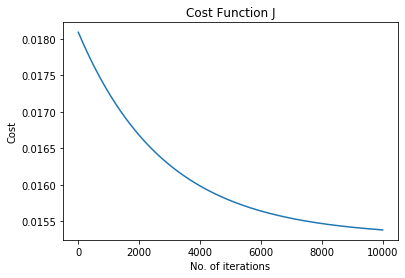

In [134]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt

housing = pd.read_csv('https://raw.githubusercontent.com/securitylab-repository/TPS-IA/master/datasets/housing.csv',delimiter=',')

# Normalisation
for col in ['median_income','total_rooms','median_house_value' ]:
  housing[col] = (housing[col] - housing[col].median()) / (housing[col].max() - housing[col].min())

y = housing.loc[:,['median_house_value']]

X = housing.loc[:,['median_income','total_rooms']]

l_cls = LinearClassifier(0.01)

l_cls.fit(X,y,10000)

print(np.array(l_cls.costs).flatten())

#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(np.array(l_cls.costs).flatten())
plt.show()

